# Bank Loan Project - EDA

Python for Exploratory Data Analysis (EDA) to extract actionable insights from complex financial data, enabling informed decision-making and adaptability in the dynamic financial landscape. Python's versatility and extensive libraries make it effective for analyzing and visualizing large datasets, providing a comprehensive overview crucial for strategic planning in the banking sector.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Profiling a Dataset

### Load Dataset

In [3]:
data=pd.read_csv('financial_loan.csv')

In [4]:
data.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  11-02-2021            13-09-2021        13-04-2021   
1     E           RENT  01-01-2021            14-12-2021        15-01-2021   
2     C           RENT  05-01-2021            12-12-2021        09-01-2021   
3     B       MORTGAGE  25-02-2021            12-12-2021        12-03-2021   
4     A       MORTGAGE  01-01-2021            14-12-2021        15-01-2021   

   ... sub_grade        term  verification_status annual_income     dti  \
0  ...        C4   60 months      Source Verified       30000.0  0.0100   
1  ...        E1   36 months      Source Verified       48000.0  0.0535   
2  ...        C5   36 months         Not Verified       50000.0  0.2088   
3  ...        B2   60 months      Source Verified       42000.0  0.0540   
4  ...        A1   36 months             Verified       83000.0  0.0231   

  installment int_rate  loan_amount  total_acc  total_payment  
0       59.83   0.1527         2500          4           1009  
1      109.43   0.1864         3000          4           3939  
2      421.65   0.1596        12000         11           3522  
3       97.06   0.1065         4500          9           4911  
4      106.53   0.0603         3500         28           3835  

[5 rows x 24 columns]

In [5]:
data.shape

(38576, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [6]:
# Change to Date datatype
data['issue_date'] = data['issue_date'].astype('datetime64')
data.head()

/var/folders/fs/wspbjrs54lb1w0_0hfwlr5s00000gn/T/ipykernel_12576/3648507996.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['issue_date'] = data['issue_date'].astype('datetime64')


id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-11-02            13-09-2021        13-04-2021   
1     E           RENT 2021-01-01            14-12-2021        15-01-2021   
2     C           RENT 2021-05-01            12-12-2021        09-01-2021   
3     B       MORTGAGE 2021-02-25            12-12-2021        12-03-2021   
4     A       MORTGAGE 2021-01-01            14-12-2021        15-01-2021   

   ... sub_grade        term  verification_status annual_income     dti  \
0  ...        C4   60 months      Source Verified       30000.0  0.0100   
1  ...        E1   36 months      Source Verified       48000.0  0.0535   
2  ...        C5   36 months         Not Verified       50000.0  0.2088   
3  ...        B2   60 months      Source Verified       42000.0  0.0540   
4  ...        A1   36 months             Verified       83000.0  0.0231   

  installment int_rate  loan_amount  total_acc  total_payment  
0       59.83   0.1527         2500          4           1009  
1      109.43   0.1864         3000          4           3939  
2      421.65   0.1596        12000         11           3522  
3       97.06   0.1065         4500          9           4911  
4      106.53   0.0603         3500         28           3835  

[5 rows x 24 columns]

In [30]:
# Creating New column Month for better analysis and trend
data['month'] = data['issue_date'].dt.month
data.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-11-02            13-09-2021        13-04-2021   
1     E           RENT 2021-01-01            14-12-2021        15-01-2021   
2     C           RENT 2021-05-01            12-12-2021        09-01-2021   
3     B       MORTGAGE 2021-02-25            12-12-2021        12-03-2021   
4     A       MORTGAGE 2021-01-01            14-12-2021        15-01-2021   

   ...        term verification_status  annual_income     dti installment  \
0  ...   60 months     Source Verified        30000.0  0.0100       59.83   
1  ...   36 months     Source Verified        48000.0  0.0535      109.43   
2  ...   36 months        Not Verified        50000.0  0.2088      421.65   
3  ...   60 months     Source Verified        42000.0  0.0540       97.06   
4  ...   36 months            Verified        83000.0  0.0231      106.53   

  int_rate loan_amount  total_acc  total_payment  month  
0   0.1527        2500          4           1009     11  
1   0.1864        3000          4           3939      1  
2   0.1596       12000         11           3522      5  
3   0.1065        4500          9           4911      2  
4   0.0603        3500         28           3835      1  

[5 rows x 25 columns]

In [9]:
# Dropping the unwanted Column
data.drop(columns=['total_acc'],inplace=True)
data.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  11-02-2021            13-09-2021        13-04-2021   
1     E           RENT  01-01-2021            14-12-2021        15-01-2021   
2     C           RENT  05-01-2021            12-12-2021        09-01-2021   
3     B       MORTGAGE  25-02-2021            12-12-2021        12-03-2021   
4     A       MORTGAGE  01-01-2021            14-12-2021        15-01-2021   

   ... purpose sub_grade        term verification_status annual_income  \
0  ...     car        C4   60 months     Source Verified       30000.0   
1  ...     car        E1   36 months     Source Verified       48000.0   
2  ...     car        C5   36 months        Not Verified       50000.0   
3  ...     car        B2   60 months     Source Verified       42000.0   
4  ...     car        A1   36 months            Verified       83000.0   

      dti installment  int_rate  loan_amount  total_payment  
0  0.0100       59.83    0.1527         2500           1009  
1  0.0535      109.43    0.1864         3000           3939  
2  0.2088      421.65    0.1596        12000           3522  
3  0.0540       97.06    0.1065         4500           4911  
4  0.0231      106.53    0.0603         3500           3835  

[5 rows x 23 columns]

In [10]:
data[['annual_income', 'installment', 'int_rate','loan_amount','total_payment']].describe()

annual_income   installment      int_rate   loan_amount  total_payment
count   3.857600e+04  38576.000000  38576.000000  38576.000000   38576.000000
mean    6.964454e+04    326.862965      0.120488  11296.066855   12263.348533
std     6.429368e+04    209.092000      0.037164   7460.746022    9051.104777
min     4.000000e+03     15.690000      0.054200    500.000000      34.000000
25%     4.150000e+04    168.450000      0.093200   5500.000000    5633.000000
50%     6.000000e+04    283.045000      0.118600  10000.000000   10042.000000
75%     8.320050e+04    434.442500      0.145900  15000.000000   16658.000000
max     6.000000e+06   1305.190000      0.245900  35000.000000   58564.000000

### Handling Null Values

In [9]:
# Check the count of null Values
data.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
month                       0
dtype: int64

In [8]:
# Check Percentage of Null Values

data.isnull().sum()*100/len(data)

id                       0.000000
address_state            0.000000
application_type         0.000000
emp_length               0.000000
emp_title                3.727706
grade                    0.000000
home_ownership           0.000000
issue_date               0.000000
last_credit_pull_date    0.000000
last_payment_date        0.000000
loan_status              0.000000
next_payment_date        0.000000
member_id                0.000000
purpose                  0.000000
sub_grade                0.000000
term                     0.000000
verification_status      0.000000
annual_income            0.000000
dti                      0.000000
installment              0.000000
int_rate                 0.000000
loan_amount              0.000000
total_acc                0.000000
total_payment            0.000000
dtype: float64

There are 1438 missing values in the dataset, specifically in the 'Emp_title' column. While this column may not be crucial for the analysis, outright dropping the missing values is not an ideal solution. Given that it contains categorical values, I am choosing to fill the null values with the mode of this column.

In [22]:
# Filling the Null Vales- Using Mode
data.emp_title.fillna(df.emp_title.mode(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              38576 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [23]:
# Finding the Duplicate Values
data.duplicated().sum()

0

In [24]:
# Count the numbers of  Unique values in each column in given dataset
for i in data.columns:
    print(i,data[i].nunique())

id 38576
address_state 50
application_type 1
emp_length 11
emp_title 28526
grade 7
home_ownership 5
issue_date 65
last_credit_pull_date 107
last_payment_date 102
loan_status 3
next_payment_date 102
member_id 38576
purpose 14
sub_grade 35
term 2
verification_status 3
annual_income 5096
dti 2863
installment 15132
int_rate 371
loan_amount 880
total_payment 19525


### Use Pandas Profile Report


In [11]:
## Use Pandas Profile Report
from pandas_profiling import ProfileReport


/Users/prashantkapse01/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/prashantkapse01/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
/var/folders/fs/wspbjrs54lb1w0_0hfwlr5s00000gn/T/ipykernel_12576/1034484329.py:2: DeprecationWarning: `import pandas_profiling` is going 

In [12]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Key Performance Indicators (KPIs) Requirements

In [63]:
## Total Loan Application
#We need to calculate the total number of loan applications received during a specified period. 

Total_Loan_Application=data.id.count()
Total_Loan_Application

38576

In [14]:
## Total Funded Amount in Million
# Understanding the total amount of funds disbursed as loans is crucial. 

Total_funded_amount=round(data.loan_amount.sum()/1000000,2)
Total_funded_amount

435.76

In [15]:
## Total Amount Received in Million
# Tracking the total amount received from borrowers is essential for assessing the bank's cash flow and loan repayment. 

Total_amount_received=round(data.total_payment.sum()/1000000,2)
Total_amount_received

473.07

In [16]:
## Average Interest Rate
# Calculating the average interest rate across all loans
Average_interest=round(data.int_rate.mean()* 100,2)
Average_interest

12.05

In [17]:
## Average Debt-to-Income Ratio (DTI)
# Evaluating the average DTI for our borrowers helps us gauge their financial health. 
Average_debt=round(data.dti.mean()* 100,2)
Average_debt

13.33

### Good Loan vs Bad Loan KPI’s
In order to evaluate the performance of lending activities and assess the quality of our loan portfolio,
I need to create a comprehensive report that distinguishes between 'Good Loans' and 'Bad Loans' based on specific loan status criteria.

### Good Loan KPI
We need to calculate the loan applications classified as 'Good Loans.' This category includes loans with a loan status of 'Fully Paid' and 'Current.

In [20]:
## Good Loan Application Percentage
good_loan_percentage= round(total_good_loan / Total_Loan_Application * 100,2)
good_loan_percentage

86.18

In [19]:
## Good Loan Applications
good_loan=data[data.loan_status!='Charged Off']

total_good_loan=good_loan['id'].count()

total_good_loan

33243

In [21]:
## Good Loan Funded Amount in Million
good_loan_funded_amount=round(good_loan['loan_amount'].sum()/1000000,2)
good_loan_funded_amount

370.22

In [22]:
## Good Loan Total Received Amount in Million
good_loan_received_amount=round(good_loan['total_payment'].sum()/1000000,2)
good_loan_received_amount

435.79

### Bad Loan KPIs
Calculating the loan applications categorized as 'Bad Loans.' This category specifically includes loans with a loan status of 'Charged Off.'

In [27]:
## Bad Loan Application Percentage
bad_loan_percentage= round(total_bad_loan / Total_Loan_Application * 100,2)
bad_loan_percentage

13.82

In [26]:
## Bad Loan Applications
bad_loan=data[data.loan_status=='Charged Off']

total_bad_loan=bad_loan['id'].count()

total_bad_loan

5333

In [25]:
## Bad Loan Funded Amount
bad_loan_funded_amount=round(bad_loan['loan_amount'].sum()/1000000,2)
bad_loan_funded_amount

65.53

In [28]:
## Bad Loan Total Received Amount
bad_loan_total_received_amount=round(bad_loan['total_payment'].sum()/1000000,2)
bad_loan_total_received_amount

37.28

### Viusualization

In [31]:
data.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'month'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'TX'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'PA'),
  Text(7, 0, 'VA'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'MA')])

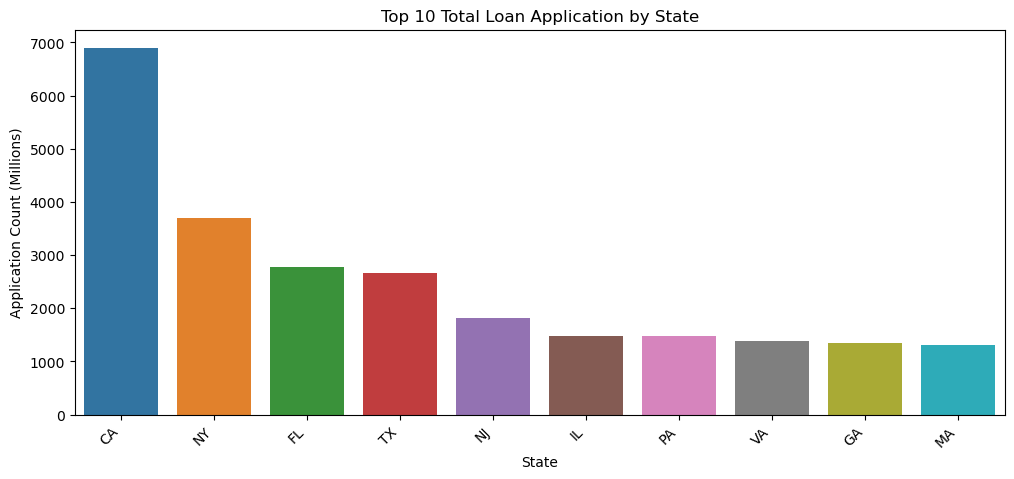

In [114]:
## Regional Analysis by State
loan_applocation_state=data.groupby('address_state')['id'].count()
top_10_state=loan_applocation_state.sort_values(ascending=False).head(10)
top_10_state

plt.figure(figsize=(12,5))
sns.barplot(x=top_10_state.index,y=top_10_state.values)
plt.title('Top 10 Total Loan Application by State')
plt.xlabel('State')
plt.ylabel('Application Count (Millions)')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'TX'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'MA')])

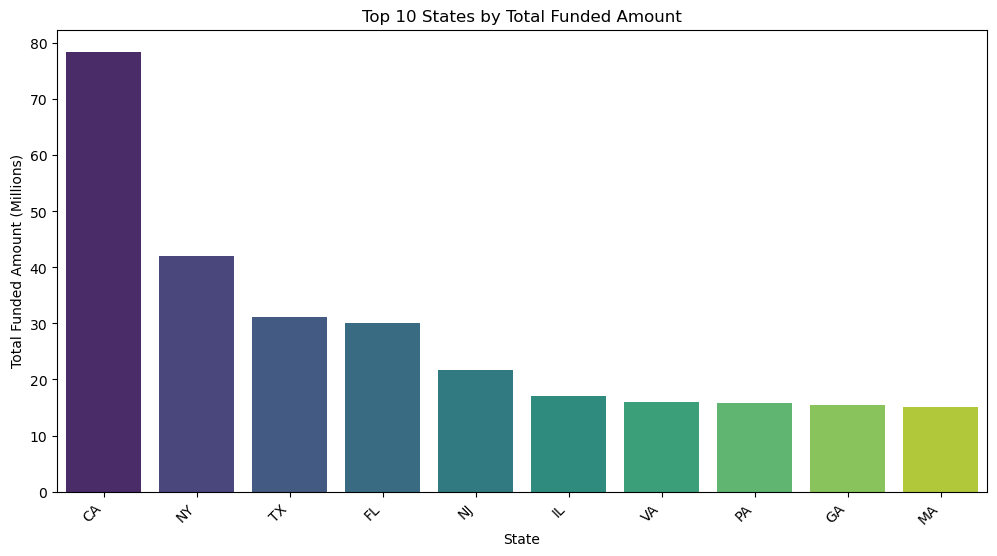

In [85]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_total_funded_amount_state.index, y=top_10_total_funded_amount_state.values, palette='viridis')

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Total Funded Amount (Millions)')
plt.title('Top 10 States by Total Funded Amount')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'NY'),
  Text(2, 0, 'TX'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'NJ'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'GA'),
  Text(9, 0, 'MA')])

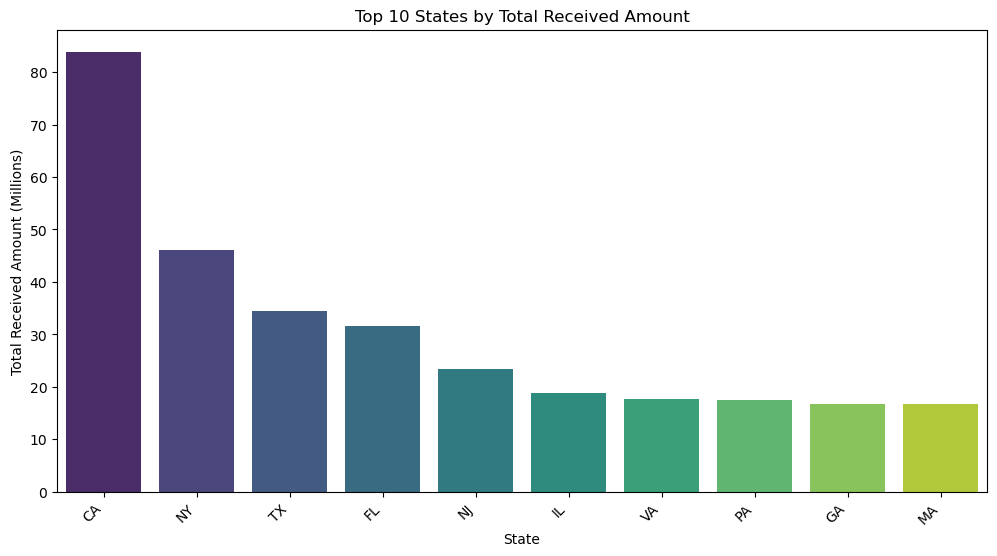

In [84]:
# Top 10 States by Total Received Amount
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_total_received_amount_state.index, y=top_10_total_received_amount_state.values, palette='viridis')

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Total Received Amount (Millions)')
plt.title('Top 10 States by Total Received Amount')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Total Loan Application by Term')

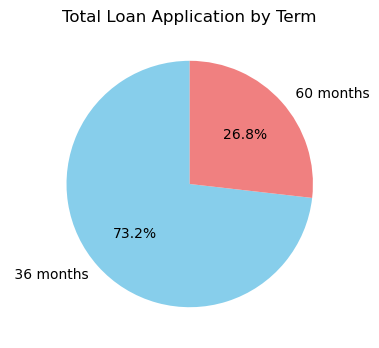

In [115]:
## Total Loan Application by Term(Pie Chart):
loan_term_analysis=data.groupby('term')['id'].count()
loan_term_analysis

plt.figure(figsize=(4, 4))
plt.pie(loan_term_analysis, labels=loan_term_analysis.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Set chart title
plt.title('Total Loan Application by Term')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '8 years'),
  Text(10, 0, '9 years')])

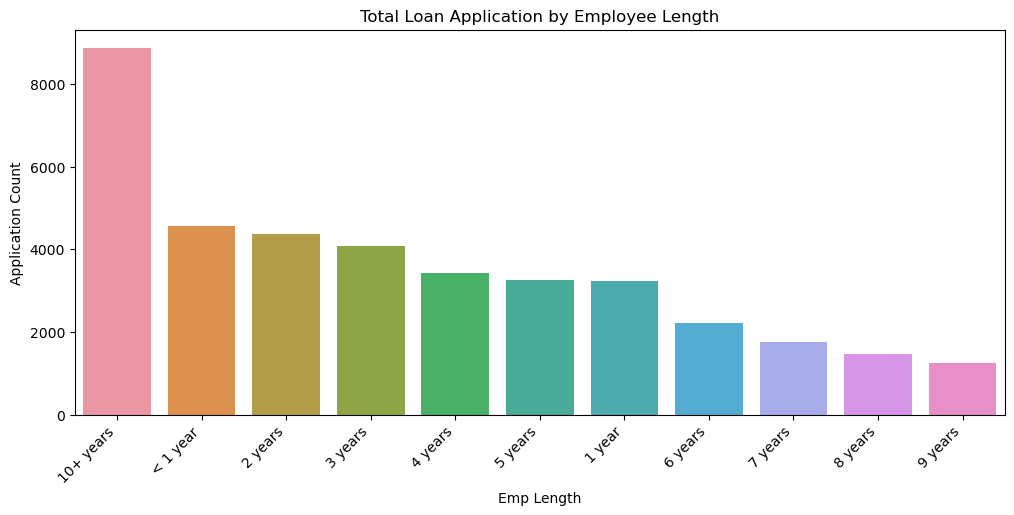

In [111]:
## Total Loan Application by Employee Length(Bar Chart)::

total_loan_application_emplenght= data.groupby('emp_length')['id'].count()
total=total_loan_application_emplenght.sort_values(ascending=False)
total

plt.figure(figsize=(12,5))
sns.barplot(x=total.index,y=total.values)
plt.title('Total Loan Application by Employee Length')
plt.xlabel('Emp Length')
plt.ylabel('Application Count')
plt.xticks(rotation=45, ha='right')

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000')])

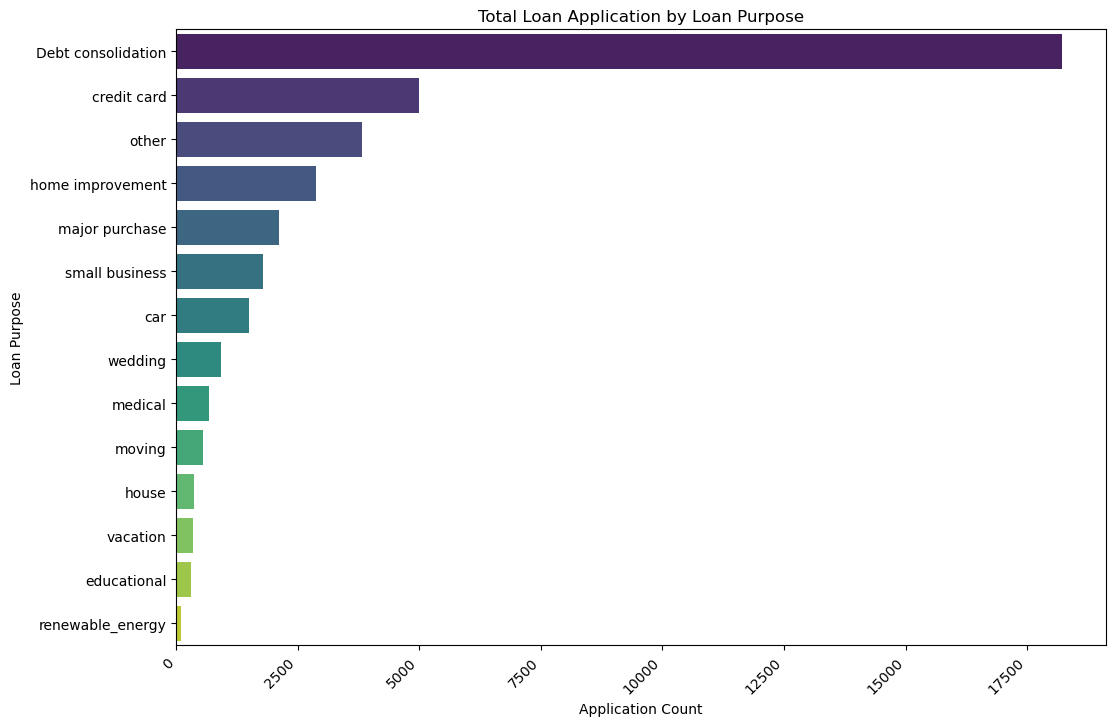

In [128]:
## Total Loan Application by Loan Purpose(Bar Chart)::

total_loan_application_Loan_Purpose= data.groupby('purpose')['id'].count()
purpose=total_loan_application_Loan_Purpose.sort_values(ascending=False)
purpose

plt.figure(figsize=(12,8))
sns.barplot(x=loan_purpose.values, y=loan_purpose.index, palette='viridis')
plt.title('Total Loan Application by Loan Purpose')
plt.xlabel('Application Count')
plt.ylabel('Loan Purpose')
plt.xticks(rotation=45, ha='right')

The Bank Loan Report project provides a comprehensive understanding of our lending operaBons, facilitaBng strategic planning and informed decision-making. 
With robust KPIs, detailed insights, and visually rich charts, this report ensures our insBtuBon is well-equipped to navigate and succeed in the dynamic lending landscape